In [9]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

with open("important_logs/vary_inducing_random_fcn_mnist10k.log") as f:
    lmls, lbs, ubs, accs, rmses, sigmas = [], [], [], [], [], []
    nums_inducing_points = []
    for line in f:
        line = line.strip()
        if "Number of inducing point" in line:
            num = int(line.split(": ")[-1].strip("----"))
            nums_inducing_points.append(num)
        elif "LML" in line:
            lml = float(line.split(": ")[-1].strip())
            lmls.append(lml)
        elif "ELBO" in line:
            elbo = float(line.split(": ")[-1].strip())
            lbs.append(elbo)
        elif "EUBO" in line:
            eubo = float(line.split(": ")[-1].strip())
            ubs.append(eubo)
        elif "Accuracy" in line:
            acc = float(line.split(": ")[-1].strip('%'))/100
            accs.append(acc)
        elif "Loss" in line:
            rmse = float(line.split(": ")[-1].strip())
            rmses.append(rmse)
        elif "Success" in line:
            sigma = float(line.split("Result: [")[-1].split(" ")[0])
            sigmas.append(sigma)
            
with open("important_logs/vary_inducing_greedy_fcn_mnist10k.log") as f:
    greedy_lmls, greedy_lbs, greedy_ubs, greedy_accs, greedy_rmses, greedy_sigmas = [], [], [], [], [], []
    nums_inducing_points = []
    for line in f:
        line = line.strip()
        if "Number of inducing point" in line:
            num = int(line.split(": ")[-1].strip("----"))
            nums_inducing_points.append(num)
        elif "LML" in line:
            lml = float(line.split(": ")[-1].strip())
            greedy_lmls.append(lml)
        elif "ELBO" in line:
            elbo = float(line.split(": ")[-1].strip())
            greedy_lbs.append(elbo)
        elif "EUBO" in line:
            eubo = float(line.split(": ")[-1].strip())
            greedy_ubs.append(eubo)
        elif "Accuracy" in line:
            acc = float(line.split(": ")[-1].strip('%'))/100
            greedy_accs.append(acc)
        elif "Loss" in line:
            rmse = float(line.split(": ")[-1].strip())
            greedy_rmses.append(rmse)
        elif "Success" in line:
            sigma = float(line.split("Result: [")[-1].split(" ")[0])
            greedy_sigmas.append(sigma)



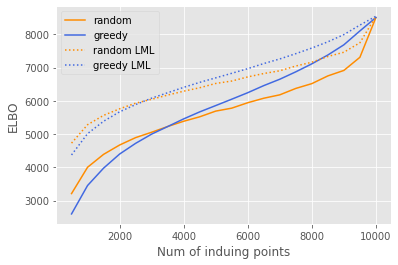

In [10]:
data="mnist10k"
model = "fcn"
plt.plot(nums_inducing_points, lbs, label="random", color='darkorange')
plt.plot(nums_inducing_points, greedy_lbs, label="greedy", color='royalblue')
plt.plot(nums_inducing_points, lmls, label="random LML", linestyle="dotted", color='darkorange')
plt.plot(nums_inducing_points, greedy_lmls, label="greedy LML", linestyle="dotted", color='royalblue')
plt.xlabel("Num of induing points")
plt.ylabel("ELBO")
plt.legend()
plt.savefig(f"figures/{data}_vary_inducing_{model}_lbs.pdf", bbox_inches='tight')

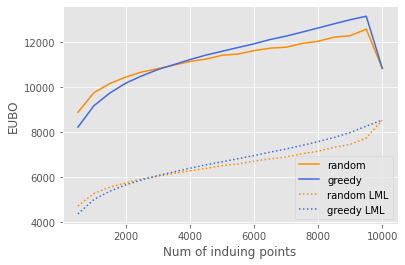

In [11]:
plt.plot(nums_inducing_points, ubs, label="random", color='darkorange')
plt.plot(nums_inducing_points, greedy_ubs, label="greedy", color='royalblue')
plt.plot(nums_inducing_points, lmls, label="random LML", linestyle="dotted", color='darkorange')
plt.plot(nums_inducing_points, greedy_lmls, label="greedy LML", linestyle="dotted", color='royalblue')
plt.xlabel("Num of induing points")
plt.ylabel("EUBO")
plt.legend()
plt.savefig(f"figures/{data}_vary_inducing_{model}_ubs.pdf", bbox_inches='tight')

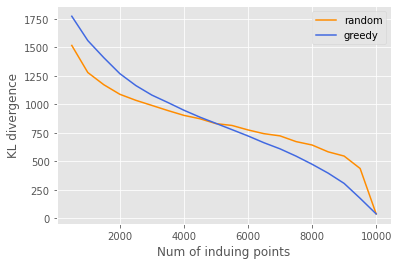

In [12]:
kl = np.array(lmls) - np.array(lbs)
greedy_kl = np.array(greedy_lmls) - np.array(greedy_lbs)
plt.plot(nums_inducing_points, kl, label="random", color='darkorange')
plt.plot(nums_inducing_points, greedy_kl, label="greedy", color='royalblue')
plt.xlabel("Num of induing points")
plt.ylabel("KL divergence")
plt.legend()
plt.savefig(f"figures/{data}_vary_inducing_{model}_kl.pdf", bbox_inches='tight')

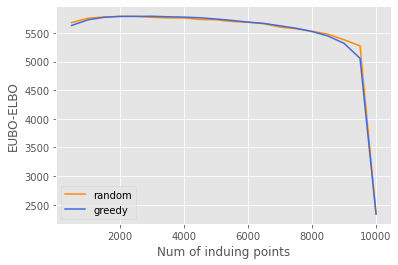

In [13]:
plt.plot(nums_inducing_points, np.array(ubs) - np.array(lbs), label="random", color='darkorange')
plt.plot(nums_inducing_points, np.array(greedy_ubs) - np.array(greedy_lbs), label="greedy", color='royalblue')
plt.xlabel("Num of induing points")
plt.ylabel("EUBO-ELBO")
plt.legend()
plt.savefig(f"figures/{data}_vary_inducing_{model}_ubs-lbs.pdf", bbox_inches='tight')

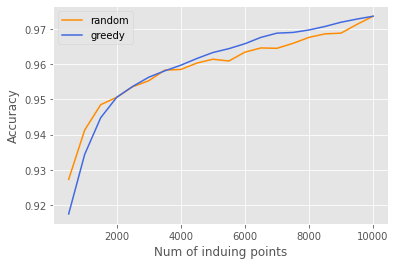

In [14]:
plt.plot(nums_inducing_points, accs, label="random", color='darkorange')
plt.plot(nums_inducing_points, greedy_accs, label="greedy", color='royalblue')
plt.xlabel("Num of induing points")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig(f"figures/{data}_vary_inducing_{model}_accs.pdf", bbox_inches='tight')

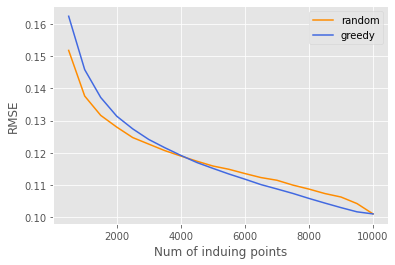

In [15]:
plt.plot(nums_inducing_points, rmses, label="random", color='darkorange')
plt.plot(nums_inducing_points, greedy_rmses, label="greedy", color='royalblue')
plt.xlabel("Num of induing points")
plt.ylabel("RMSE")
plt.legend()
plt.savefig(f"figures/{data}_vary_inducing_{model}_rmses.pdf", bbox_inches='tight')

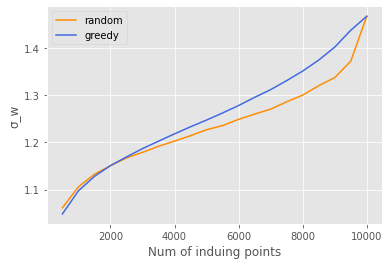

In [17]:
plt.plot(nums_inducing_points, sigmas, label="random", color='darkorange')
plt.plot(nums_inducing_points, greedy_sigmas, label="greedy", color='royalblue')
plt.xlabel("Num of induing points")
plt.ylabel("\u03C3_w")
plt.legend()
plt.savefig(f"figures/{data}_vary_inducing_{model}_sigmas.pdf", bbox_inches='tight')